<div align=center>

<font size=5>
    In the Name of God
<font/>
<br/>
<br/>
<font>
    Sharif University of Technology - Departmenet of Electrical Engineering
</font>
<br/>
<font>
    Introducing with Machine Learing - Dr. S. Amini
</font>
<br/>
<br/>
Spring 2023

</div>

<hr/>
<div align=center>
<font size=6>
    Neural Networks Practical Assignment

    Question 2
</font>
<br/>
<font size=4>
<br/>
</div>

# Personal Data

In [1]:
# Set your student number
student_number = 99102507
Name = 'Amir Hossein'
Last_Name = 'Yari'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- In this question, you are allowed to use `torch.optim`, `torch.nn` or any other submodule you need.
- You **are not allowed** to use the models already implemented or the pretrained models in torch.

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

## Importing Libraries

In [2]:
import torch
import torchvision
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

You should load the train and test set of the `CIFAR10` dataset and apply the desired transforms on it. Then, you should create the loaders for these `test` and `train` sets.
- **Hint:** You can use `torchvision.datasets` to easily load the CIFAR10 dataset.

In [3]:
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

trainloader = DataLoader(train_set, batch_size=64, shuffle=True)
testloader = DataLoader(test_set, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


## Visualization

Visualize 1 random image from each class


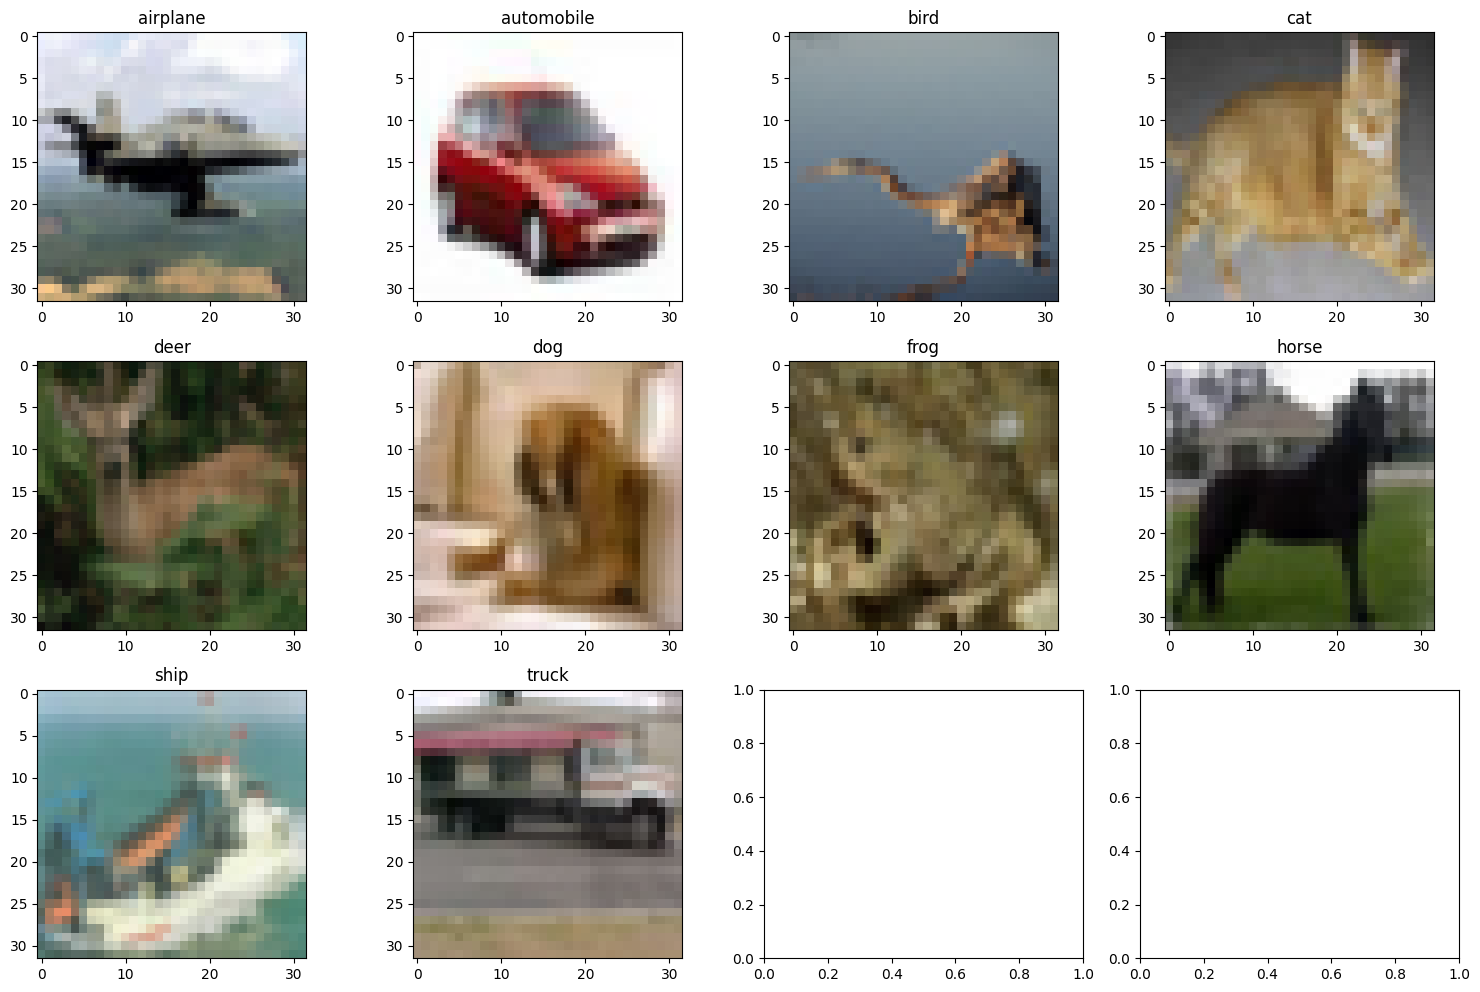

In [4]:
classes = train_set.classes

# Initialize images
images = {}
for i in classes:
  images[i] = None

# Visualize random image from each class
for img, labels in trainloader:
  for i in range(len(labels)):
    index = labels[i].item()
    if images[classes[index]] is None:
      images[classes[index]] = img[i]
  if all([j is not None for j in images.values()]):
    break

# Plotting
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
for i in range(len(classes)):
  axs[divmod(i, 4)].imshow(images[classes[i]].permute(1, 2, 0))
  axs[divmod(i, 4)].set_title(classes[i])
fig.tight_layout(pad=1.0)

## Defining a Convolutional Neural Network

In this section, you should define a class called `Net` which represents the model for your convolutional neural network.
- **Hint:** You can use `torch.nn` to add the required layers to your model.

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=64 * 8 * 8, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

## Define a Loss function and optimizer

In this section, you simply define your loss function and optimizer.
- **Hint:** You can use `torch.optim` and implemented loss functions in torch.

In [6]:
## FILL HERE
lossFunc = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

## Training the model

You should train your model for multiple epochs. You are free to choose the number of epochs. However, you should reach an acceptable accuracy at the end.

In [7]:
epoch_nums = 25
for epoch in range(epoch_nums):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = lossFunc(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
          print(f'epoch [{epoch + 1}, batch {i + 1:5d}] -> loss = {running_loss / 100:.4f}')
          running_loss = 0.0

print('Finished Training')

epoch [1, batch   100] -> loss = 1.9459
epoch [1, batch   200] -> loss = 1.6081
epoch [1, batch   300] -> loss = 1.4932
epoch [1, batch   400] -> loss = 1.3579
epoch [1, batch   500] -> loss = 1.3316
epoch [1, batch   600] -> loss = 1.2980
epoch [1, batch   700] -> loss = 1.2346
epoch [2, batch   100] -> loss = 1.1611
epoch [2, batch   200] -> loss = 1.0930
epoch [2, batch   300] -> loss = 1.1035
epoch [2, batch   400] -> loss = 1.0743
epoch [2, batch   500] -> loss = 1.0840
epoch [2, batch   600] -> loss = 1.0246
epoch [2, batch   700] -> loss = 1.0279
epoch [3, batch   100] -> loss = 0.9210
epoch [3, batch   200] -> loss = 0.9393
epoch [3, batch   300] -> loss = 0.9158
epoch [3, batch   400] -> loss = 0.9426
epoch [3, batch   500] -> loss = 0.9204
epoch [3, batch   600] -> loss = 0.9101
epoch [3, batch   700] -> loss = 0.8906
epoch [4, batch   100] -> loss = 0.8286
epoch [4, batch   200] -> loss = 0.8135
epoch [4, batch   300] -> loss = 0.8213
epoch [4, batch   400] -> loss = 0.8334


## Test the network on the test data

In the following section, you should test your network and calculate the accuracy of your model on the test dataset.

In [8]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total = total + labels.size(0)
        correct = correct + (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 69 %


Here, we also calculate the model performance for each class as well.

In [9]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        for label, prediction in zip(labels, predicted):
            classname = classes[label]
            if prediction == label:
                correct_pred[classname] = correct_pred[classname] + 1
            total_pred[classname] = total_pred[classname] + 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: airplane is 68.8 %
Accuracy for class: automobile is 74.4 %
Accuracy for class: bird  is 62.4 %
Accuracy for class: cat   is 51.1 %
Accuracy for class: deer  is 63.4 %
Accuracy for class: dog   is 58.7 %
Accuracy for class: frog  is 80.4 %
Accuracy for class: horse is 73.7 %
Accuracy for class: ship  is 78.3 %
Accuracy for class: truck is 79.9 %
